<a href="https://colab.research.google.com/github/utkarsh0702/Projects/blob/master/pothole_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os
from tensorflow import keras
import zipfile
from google.colab import files
!pip install -q -U "tensorflow-gpu==2.0.0b1"

     |████████████████████████████████| 348.9MB 46kB/s 
     |████████████████████████████████| 3.1MB 41.5MB/s 
     |████████████████████████████████| 501kB 53.8MB/s 


In [2]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
local_zip= '/content/drive/My Drive/datasets/Pothole Dataset.zip'
zip_ref= zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [0]:
train_pos_dir= os.path.join('/content/Pothole Dataset/Train/Positive')
train_neg_dir= os.path.join('/content/Pothole Dataset/Train/Negative')
test_pos_dir= os.path.join('/content/Pothole Dataset/Test/Positive')
test_neg_dir= os.path.join('/content/Pothole Dataset/Test/Negative')

In [7]:
print('Total train Positive images: ',len(os.listdir(train_pos_dir)))
print('Total train Negative images: ',len(os.listdir(train_neg_dir)))
print('Total test Positive images: ',len(os.listdir(test_pos_dir)))
print('Total test Negative images: ',len(os.listdir(test_neg_dir)))

Total train Positive images:  597
Total train Negative images:  606
Total test Positive images:  183
Total test Negative images:  148


In [8]:
model= keras.Sequential([
    keras.layers.Conv2D(16,(3,3), activation='relu',strides=(1,1),padding='same', input_shape=(300,300,3)),
    keras.layers.BatchNormalization(axis= 3),
    keras.layers.Conv2D(32,(3,3), activation='relu',strides=(1,1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(16,(3,3), activation='relu',strides=(1,1)),
    keras.layers.BatchNormalization(axis= 3),
    keras.layers.Conv2D(32,(3,3), activation='relu',strides=(1,1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(64,(3,3), activation='relu',strides=(1,1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.BatchNormalization(axis= 3),
    keras.layers.DepthwiseConv2D((3, 3), (1, 1), activation = "relu"),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu', activity_regularizer=keras.regularizers.l1_l2(l1= 0.01, l2=0.01)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 300, 300, 16)      64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 298, 298, 32)      4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 147, 147, 16)      4624      
_________________________________________________________________
batch_normalization_1 (Batch (None, 147, 147, 16)      6

In [10]:
from tensorflow.keras.optimizers import Adam

#compiling the model
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(
    rescale= 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_gen= train_datagen.flow_from_directory( '/content/Pothole Dataset/Train',
                                            target_size=(300,300),
                                            batch_size=25,
                                            class_mode='binary')

test_datagen= ImageDataGenerator(
    rescale= 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_gen= test_datagen.flow_from_directory( '/content/Pothole Dataset/Test',
                                            target_size=(300,300),
                                            batch_size=7,
                                            class_mode='binary')

Found 1203 images belonging to 2 classes.
Found 331 images belonging to 2 classes.


In [13]:
history= model.fit_generator( train_gen,
                   steps_per_epoch=50,
                   epochs=15,
                   validation_data= test_gen,
                   validation_steps= 50,
                   verbose=2 )

Epoch 1/15
Epoch 1/15
50/50 - 65s - loss: 0.7305 - acc: 0.5449
50/50 - 232s - loss: 0.6466 - acc: 0.7647 - val_loss: 0.7305 - val_acc: 0.5449
Epoch 2/15
Epoch 1/15
50/50 - 63s - loss: 0.7391 - acc: 0.5565
50/50 - 177s - loss: 0.6014 - acc: 0.8013 - val_loss: 0.7391 - val_acc: 0.5565
Epoch 3/15
Epoch 1/15
50/50 - 65s - loss: 0.7979 - acc: 0.5507
50/50 - 178s - loss: 0.5762 - acc: 0.8054 - val_loss: 0.7979 - val_acc: 0.5507
Epoch 4/15
Epoch 1/15
50/50 - 64s - loss: 0.8637 - acc: 0.5420
50/50 - 176s - loss: 0.5573 - acc: 0.7964 - val_loss: 0.8637 - val_acc: 0.5420
Epoch 5/15
Epoch 1/15
50/50 - 63s - loss: 0.8454 - acc: 0.5565
50/50 - 176s - loss: 0.5123 - acc: 0.8257 - val_loss: 0.8454 - val_acc: 0.5565
Epoch 6/15
Epoch 1/15
50/50 - 66s - loss: 0.7645 - acc: 0.5507
50/50 - 181s - loss: 0.4865 - acc: 0.8217 - val_loss: 0.7645 - val_acc: 0.5507
Epoch 7/15
Epoch 1/15
50/50 - 64s - loss: 0.6882 - acc: 0.6435
50/50 - 180s - loss: 0.4635 - acc: 0.8355 - val_loss: 0.6882 - val_acc: 0.6435
Epoch 

In [0]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

Saving _105909770_m1pothole.jpg to _105909770_m1pothole.jpg
Saving 6542_201907190702.jpg to 6542_201907190702.jpg
Saving download (1).jpg to download (1).jpg
Saving download.jpg to download.jpg
Saving Pothole biker DH-1566331512.jpg to Pothole biker DH-1566331512.jpg
Saving pothole.jpeg to pothole.jpeg
Saving Rogue-hero-640x354.jpg to Rogue-hero-640x354.jpg
Saving rr_generations_45_04_111200-e1438941846824.jpg to rr_generations_45_04_111200-e1438941846824.jpg
Saving vehicles-on-road-1.png to vehicles-on-road-1.png
Saving web.ns_.potholes.JA_-640x426.jpg to web.ns_.potholes.JA_-640x426.jpg


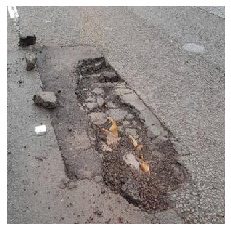

[1.]
The image is of a Pothole


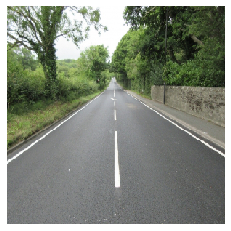

[1.]
The image is of a Pothole


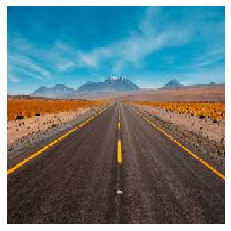

[0.]
The image is not a Pothole


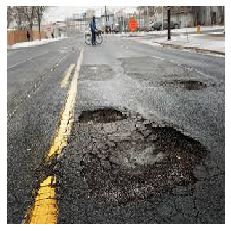

[1.]
The image is of a Pothole


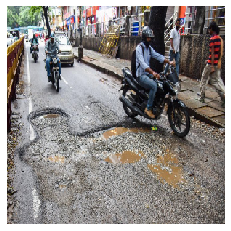

[1.]
The image is of a Pothole


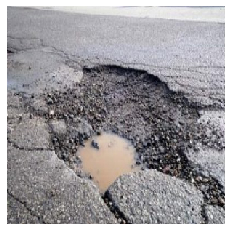

[1.]
The image is of a Pothole


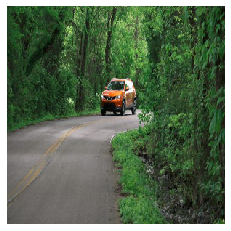

[1.]
The image is of a Pothole


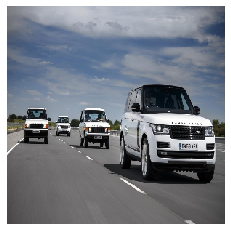

[1.]
The image is of a Pothole


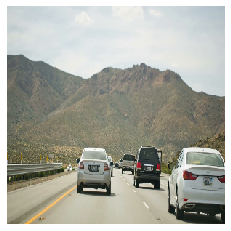

[1.]
The image is of a Pothole


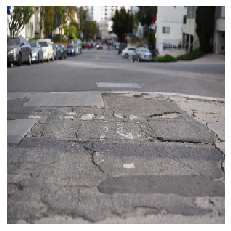

[1.]
The image is of a Pothole


Saving _105909770_m1pothole.jpg to _105909770_m1pothole.jpg
Saving 6542_201907190702.jpg to 6542_201907190702.jpg
Saving download (1).jpg to download (1).jpg
Saving download.jpg to download.jpg
Saving Pothole biker DH-1566331512.jpg to Pothole biker DH-1566331512.jpg
Saving pothole.jpeg to pothole.jpeg
Saving Rogue-hero-640x354.jpg to Rogue-hero-640x354.jpg
Saving rr_generations_45_04_111200-e1438941846824.jpg to rr_generations_45_04_111200-e1438941846824.jpg
Saving vehicles-on-road-1.png to vehicles-on-road-1.png
Saving web.ns_.potholes.JA_-640x426.jpg to web.ns_.potholes.JA_-640x426.jpg


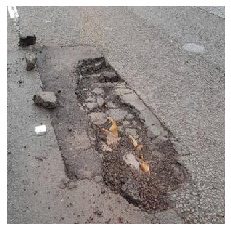

[1.]
The image is of a Pothole


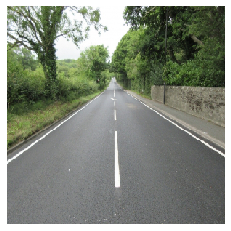

[1.]
The image is of a Pothole


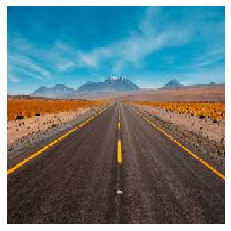

[0.]
The image is not a Pothole


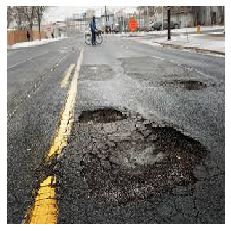

[1.]
The image is of a Pothole


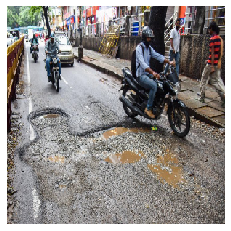

[1.]
The image is of a Pothole


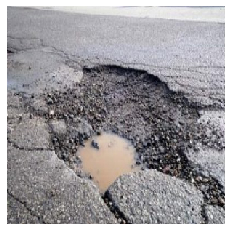

[1.]
The image is of a Pothole


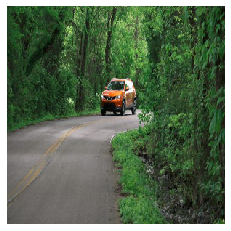

[1.]
The image is of a Pothole


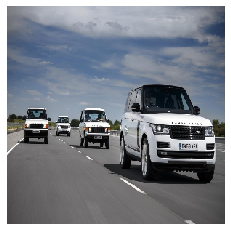

[1.]
The image is of a Pothole


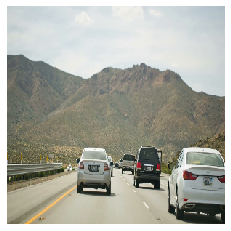

[1.]
The image is of a Pothole


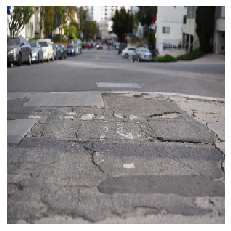

[1.]
The image is of a Pothole


In [18]:
uploaded= files.upload()

for fn in uploaded.keys():
  # predict image
  path='/content/' + fn
  img= image.load_img(path, target_size=(300,300))
  plt.axis('off')
  plt.imshow(img)
  plt.show()
  x= image.img_to_array(img)
  x= np.expand_dims(x, axis=0)
  
  images= np.vstack([x])
  classes= model.predict(images, batch_size=10)
  print(classes[0])
  if(classes[0]>0.5):
    print('The image is of a Pothole')
    
  else:
    print('The image is not a Pothole')
  

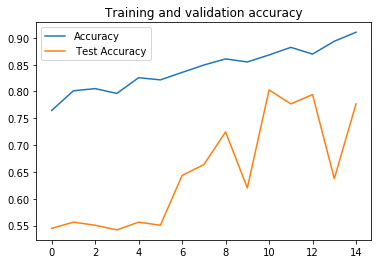

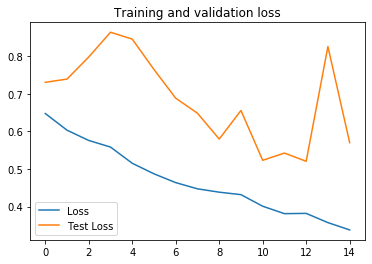

In [19]:
acc= history.history['acc']
val_acc= history.history['val_acc']
loss= history.history['loss']
val_loss= history.history['val_loss']

epochs= range(len(acc))
plt.plot(epochs, acc, label='Accuracy')
plt.plot(epochs, val_acc, label=' Test Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(epochs, loss, label='Loss')
plt.plot(epochs, val_loss, label='Test Loss')
plt.title('Training and validation loss')
plt.legend(loc='best')
plt.show()

In [0]:
import pathlib
import tensorflow as tf

In [21]:
export_dir= '/content/saved_model'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: /content/saved_model/assets


In [33]:
#converting and quantizing the model
converter= tf.lite.TFLiteConverter.from_saved_model(export_dir)
converter.allow_custom_ops= True
converter.optimization=[tf.lite.Optimize.DEFAULT]
tflite_model= converter.convert()

INFO:tensorflow:Restoring parameters from /content/saved_model/variables/variables
INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'serving_default', '__saved_model_init_op'}
INFO:tensorflow:input tensors info: 
INFO:tensorflow:Tensor's key in saved_model's tensor_map: conv2d_input
INFO:tensorflow: tensor name: serving_default_conv2d_input:0, shape: (-1, 300, 300, 3), type: DT_FLOAT
INFO:tensorflow:output tensors info: 
INFO:tensorflow:Tensor's key in saved_model's tensor_map: dense_1
INFO:tensorflow: tensor name: StatefulPartitionedCall:0, shape: (-1, 1), type: DT_FLOAT
INFO:tensorflow:Restoring parameters from /content/saved_model/variables/variables
INFO:tensorflow:Froze 28 variables.
INFO:tensorflow:Converted 28 variables to const ops.


Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the function.Use '@tf.function' or '@defun' to decorate the f

In [34]:
#save the model
tflite_model_file= pathlib.Path('/content/drive/My Drive/Pothhole_Detection_tflite_model.tflite')
tflite_model_file.write_bytes( tflite_model )

33703312

In [30]:
print(model)